<a href="https://colab.research.google.com/github/FAYASISMAEL/AI-ML-Visualization-Files/blob/main/DecisionTreeLogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = pd.read_csv('/content/heart_v2.csv')
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [25]:

data.shape

(270, 5)

In [26]:
data.isna().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [27]:
data.duplicated().sum()

np.int64(0)

In [28]:
data= data.drop_duplicates()

In [29]:
for col in data.columns:
  print(col, data[col].unique())

age [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
sex [1 0]
BP [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
cholestrol [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
heart disease [1 0]


In [30]:
data = data.apply(pd.to_numeric, errors = 'coerce')

In [31]:
data = data.fillna(data.median())

In [32]:
X = data.drop('heart disease', axis=1)
y = data['heart disease']

In [33]:
X.columns

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [34]:
y.name

'heart disease'

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [36]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (189, 4)
X_test shape : (81, 4)
y_train shape : (189,)
y_test shape : (81,)


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [40]:
log_reg = LogisticRegression(
    max_iter=1000,        # increase iterations to ensure convergence
    random_state=100,
    solver='lbfgs'        # standard solver
)

log_reg.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [41]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Prediction generated successfully!")
print("\nSample prediction (first 10):")
print(y_test_pred[:10])


Prediction generated successfully!

Sample prediction (first 10):
[0 0 1 1 1 1 1 0 1 1]


In [42]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.6666666666666666
Test Accuracy : 0.6666666666666666


In [44]:
data = DecisionTreeClassifier(
    max_depth = 3,
    random_state = 42
)
data.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

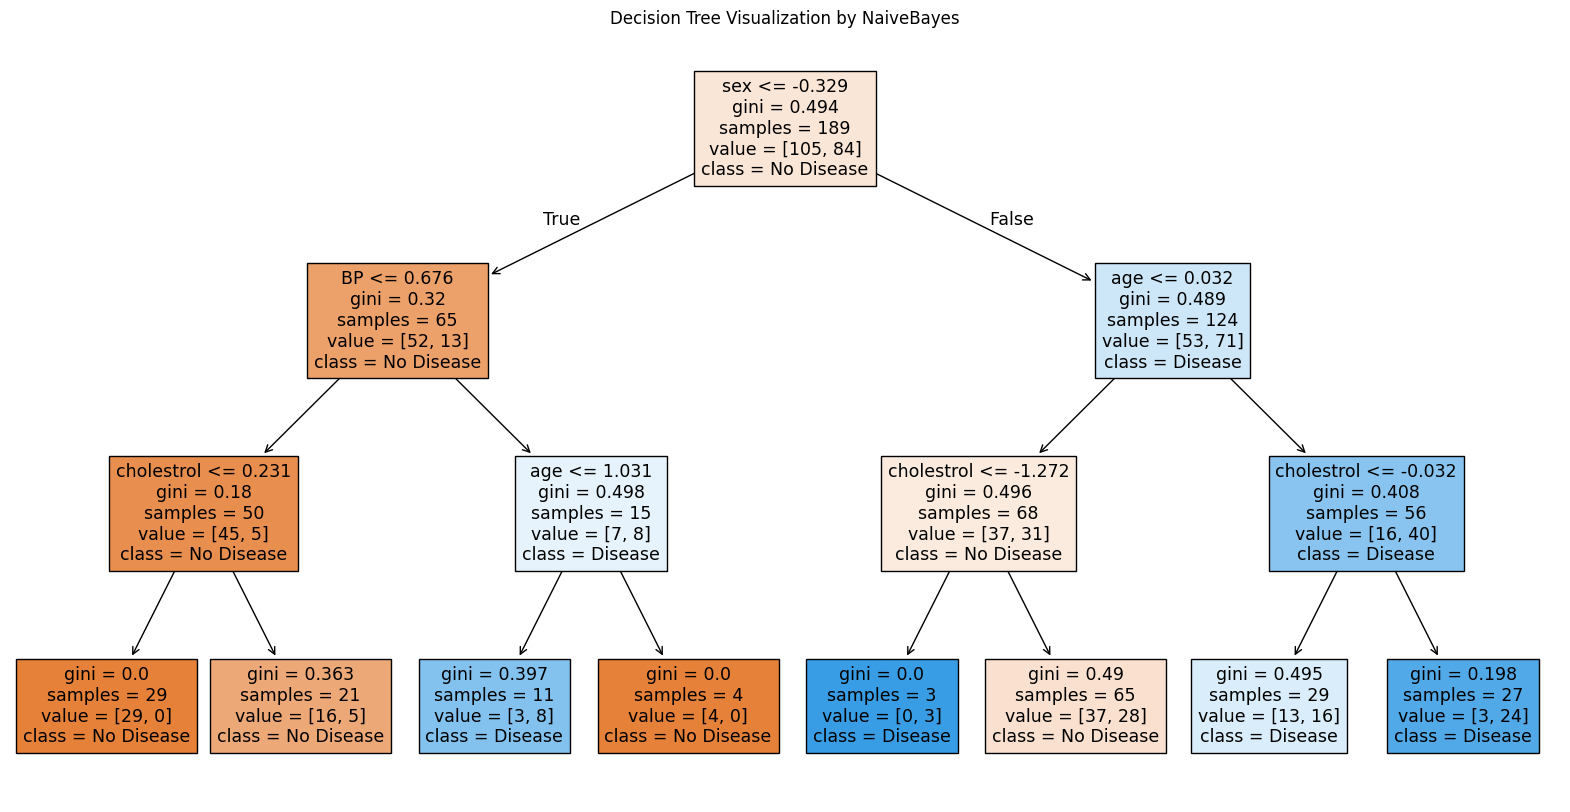

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(
    data,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.title("Decision Tree Visualization by NaiveBayes")
plt.show()